In [6]:
import pandas as pd
import numpy as np
from skimpy import clean_columns
import matplotlib.pyplot as plt


# Read Data

In [30]:
# Read literature review data.

lit_review_data = pd.read_csv("lit_review_data.csv")
lit_review_data = clean_columns(lit_review_data)
lit_review_data


20 column names have been cleaned

,title,author,year,country,continent,climate,comparison,response,response_category,local_factor,local_strategy,local_effect,landscape,landscape_gradient,minimum_complexity,maximum_complexity,landscape_effect,interaction_details,interaction_effect,description
0,A macro-scale perspective on within-farm manag...,Amano et al.,2011,Japan,Asia,NaN,Conventional,Spider abundance,Natural enemy,Pesticide use,Intensity,Negative,The proportion of forest area surrounding the ...,"<20% forest, >20% forest",NaN,NaN,Positive,NS,NS,A multilevel modelling approach revealed that ...
1,A multitaxa assessment of the effectiveness of...,Boetzel et al.,2021,Germany,Europe,NaN,Conventional,Cicada species richness,Arthropod,"Flower field age (new, refreshed, continuous)",Floral,NS,The amount of seminatural habitat (forest edge...,3.6-25% semi-natural habitat,3.6,25.0,NS,NS,NS,All other taxonomic groups showed no significa...
2,A multitaxa assessment of the effectiveness of...,Boetzel et al.,2021,Germany,Europe,NaN,Conventional,Orthopteran species richness,Arthropod,"Flower field age (new, refreshed, continuous)",Floral,NS,The amount of seminatural habitat (forest edge...,3.6-25% semi-natural habitat,3.6,25.0,NS,NS,NS,All other taxonomic groups showed no significa...
3,A multitaxa assessment of the effectiveness of...,Boetzel et al.,2021,Germany,Europe,NaN,Conventional,Bee species richness,Pollinator,"Flower field age (new, refreshed, continuous)",Floral,NS,The amount of seminatural habitat (forest edge...,3.6-25% semi-natural habitat,3.6,25.0,Positive,NS,NS,An increasing proportion of seminatural habita...
4,A multitaxa assessment of the effectiveness of...,Boetzel et al.,2021,Germany,Europe,NaN,Conventional,Butterfly species richness,Pollinator,"Flower field age (new, refreshed, continuous)",Floral,NS,The amount of seminatural habitat (forest edge...,3.6-25% semi-natural habitat,3.6,25.0,NS,NS,NS,All other taxonomic groups showed no significa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,Wild bee pollinators provide the majority of c...,Winfree et al.,2007,United States,North America,NaN,Conventional,Abundance (wood-nesting bees),Pollinator,Organic,Intensity,NS,We analysed landscape cover as the proportion ...,3-64% woodland,3.0,64.0,NS,NS,NS,The abundance of wood-nesting bees was associa...
577,Wild bee pollinators provide the majority of c...,Winfree et al.,2007,United States,North America,NaN,Conventional,Wild bee visitation,Pollinator,Local floral resources,Floral,NS,We analysed landscape cover as the proportion ...,3-64% woodland,3.0,64.0,NS,NS,NS,"Similarly, no individual variables were strong..."
578,Wild bee pollinators provide the majority of c...,Winfree et al.,2007,United States,North America,NaN,Conventional,Abundance (eusocial bees),Pollinator,Local floral resources,Floral,NS,We analysed landscape cover as the proportion ...,3-64% woodland,3.0,64.0,NS,NS,NS,"Similarly, no individual variables were strong..."
579,Wild bee pollinators provide the majority of c...,Winfree et al.,2007,United States,North America,NaN,Conventional,Abundance (solitary bees),Pollinator,Local floral resources,Floral,Positive,We analysed landscape cover as the proportion ...,3-64% woodland,3.0,64.0,NS,NS,NS,The abundance of solitary bees showed little a...


In [27]:
# Convert column data types.

lit_review_data[
    [
        "title",
        "author",
        "country",
        "continent",
        "comparison",
        "response",
        "response_category",
        "local_factor",
        "local_strategy",
        "local_effect",
        "landscape",
        "landscape_effect",
        "interaction_effect",
    ]
] = lit_review_data.loc[
    :,
    [
        "title",
        "author",
        "country",
        "continent",
        "comparison",
        "response",
        "response_category",
        "local_factor",
        "local_strategy",
        "local_effect",
        "landscape",
        "landscape_effect",
        "interaction_effect",
    ],
].astype(
    "category"
)


# Geographical Distribution

<AxesSubplot: title={'center': 'Continent Count'}>

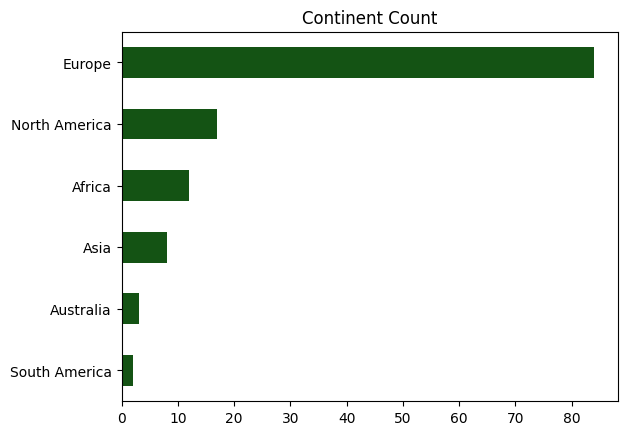

In [69]:
# By continent.

lit_review_data.drop_duplicates(subset="title").continent.value_counts(
    ascending=True
).plot(kind="barh", title="Continent Count", color="#145314")


<AxesSubplot: title={'center': 'Country Count'}, ylabel='continent,country'>

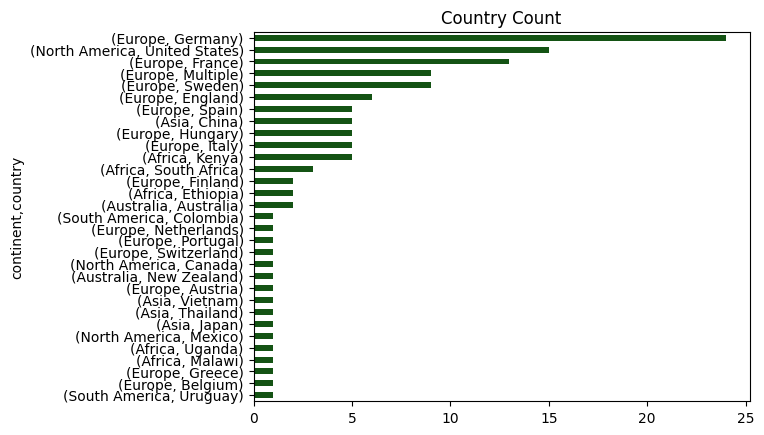

In [70]:
# By country.

lit_review_data.drop_duplicates(subset="title").groupby(
    "continent"
).country.value_counts().sort_values(ascending=True).plot(
    kind="barh", stacked=True, title="Country Count", color='#145314'
)


<AxesSubplot: title={'center': 'Country Count by Continent'}, xlabel='continent'>

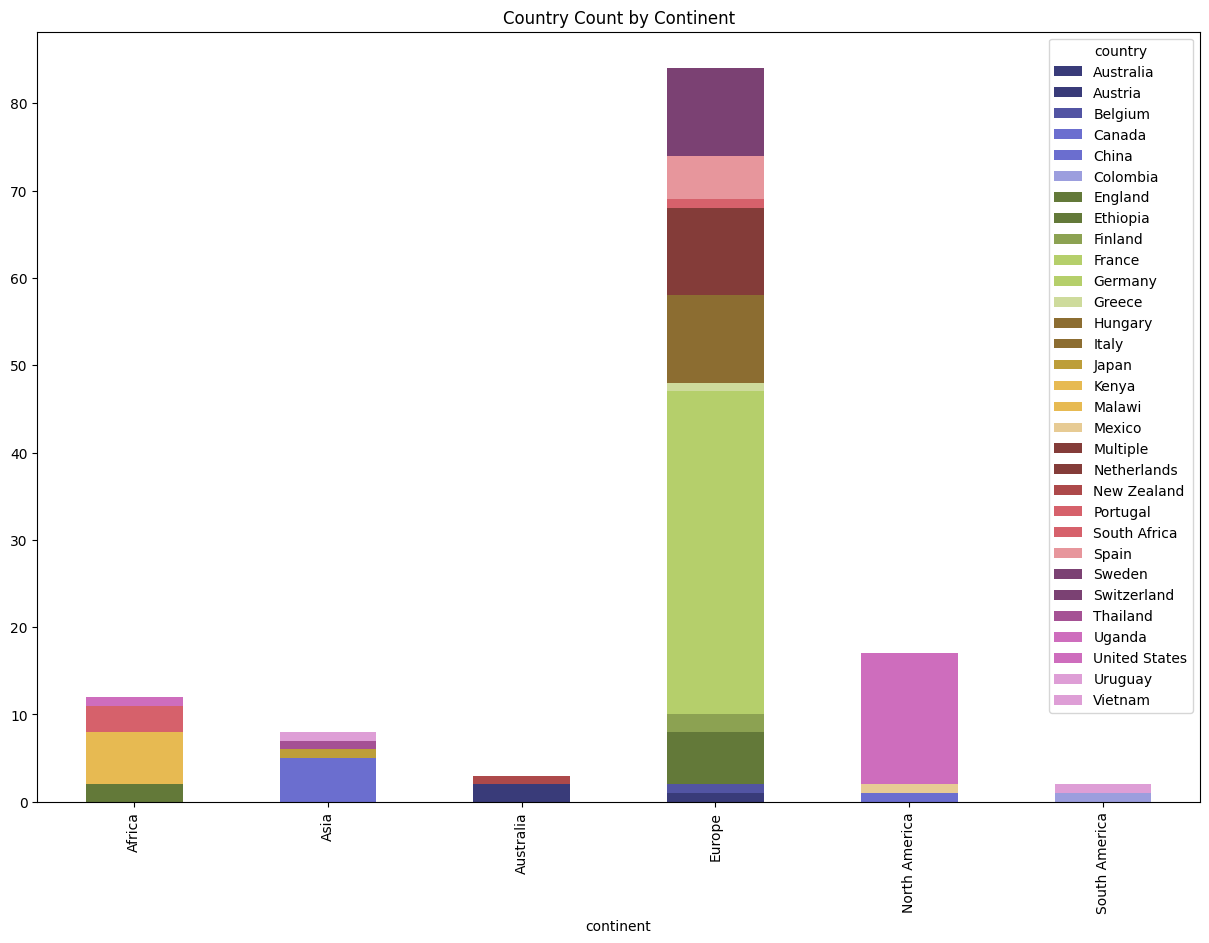

In [57]:
# By continent, separated by country.

lit_review_data.drop_duplicates(subset="title").groupby(
    ["continent", "country"]
).size().unstack().plot(
    kind="bar",
    stacked=True,
    cmap="tab20b",
    title="Country Count by Continent",
    figsize=(15, 10),
)
